In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [5]:
occ = pd.read_csv('./data/occupancy.csv')

In [7]:
occ.head()

,time,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
0,2022-09-01 00:00:00,4.0,9.0,2.0,10.0,7.0,4.0,4.0,20.0,36.0,...,16.0,1.0,4.0,5.0,6.0,0.0,4.0,2.0,2.0,0.0
1,2022-09-01 01:00:00,7.0,6.0,2.0,6.0,8.0,7.0,5.0,19.0,47.0,...,25.0,2.0,10.0,6.0,7.0,0.0,3.0,3.0,3.0,4.0
2,2022-09-01 02:00:00,7.0,3.0,1.0,10.0,8.0,8.0,5.0,20.0,60.0,...,17.0,1.0,0.0,5.0,8.0,0.0,7.0,3.0,1.0,8.0
3,2022-09-01 03:00:00,8.0,3.0,1.0,10.0,9.0,8.0,5.0,20.0,58.0,...,17.0,1.0,10.0,5.0,8.0,1.0,7.0,3.0,1.0,3.0
4,2022-09-01 04:00:00,6.0,6.0,2.0,8.0,9.0,7.0,5.0,19.0,54.0,...,25.0,2.0,10.0,5.0,7.0,0.0,3.0,3.0,2.0,0.0


In [9]:
num_zeros = (occ == 0).sum().sum()
(num_zeros/(occ.size))*100 # 34% of the data is not occupied (zero)

34.24440483264012

In [11]:
# set time as index
occ = (occ
              .set_index(pd.DatetimeIndex(occ['time']))
              .drop('time', axis=1)
              .sort_index())

occ.head()

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
time,,,,,,,,,,,,,,,,,,,,,
2022-09-01 00:00:00,4.0,9.0,2.0,10.0,7.0,4.0,4.0,20.0,36.0,22.0,...,16.0,1.0,4.0,5.0,6.0,0.0,4.0,2.0,2.0,0.0
2022-09-01 01:00:00,7.0,6.0,2.0,6.0,8.0,7.0,5.0,19.0,47.0,33.0,...,25.0,2.0,10.0,6.0,7.0,0.0,3.0,3.0,3.0,4.0
2022-09-01 02:00:00,7.0,3.0,1.0,10.0,8.0,8.0,5.0,20.0,60.0,29.0,...,17.0,1.0,0.0,5.0,8.0,0.0,7.0,3.0,1.0,8.0
2022-09-01 03:00:00,8.0,3.0,1.0,10.0,9.0,8.0,5.0,20.0,58.0,28.0,...,17.0,1.0,10.0,5.0,8.0,1.0,7.0,3.0,1.0,3.0
2022-09-01 04:00:00,6.0,6.0,2.0,8.0,9.0,7.0,5.0,19.0,54.0,31.0,...,25.0,2.0,10.0,5.0,7.0,0.0,3.0,3.0,2.0,0.0


In [13]:
occ[['1004']]

,1004
time,
2022-09-01 00:00:00,10.0
2022-09-01 01:00:00,6.0
2022-09-01 02:00:00,10.0
2022-09-01 03:00:00,10.0
2022-09-01 04:00:00,8.0
...,...
2023-08-31 19:00:00,5.0
2023-08-31 20:00:00,5.0
2023-08-31 21:00:00,6.0


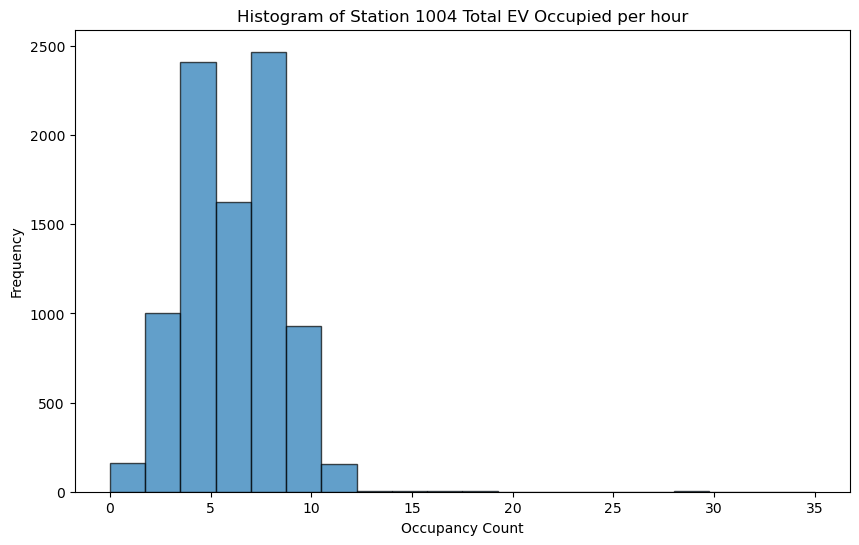

In [23]:
# histogram
plt.figure(figsize=(10, 6)) 
plt.hist(occ['1004'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Occupancy Count') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 1004 Total EV Occupied per hour')
plt.show() 

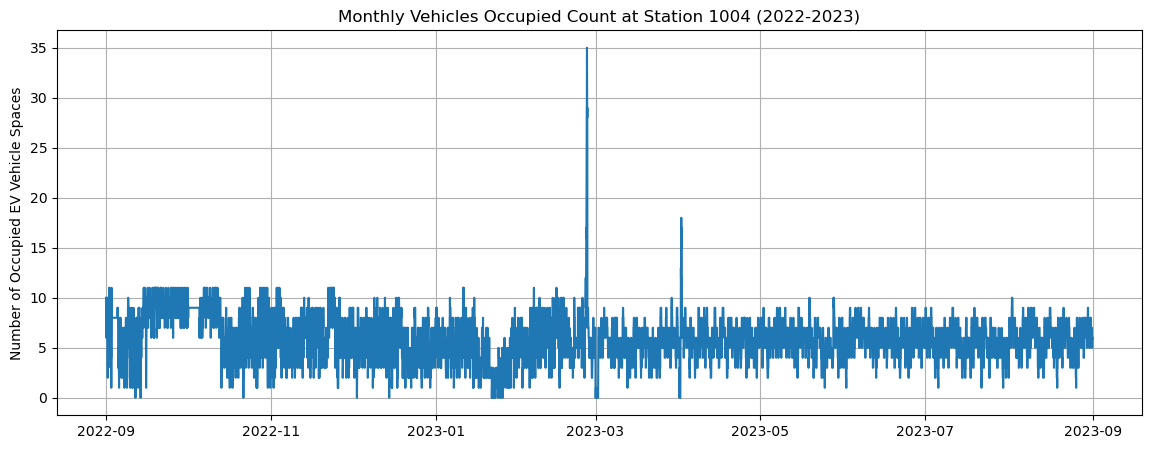

In [15]:
# Create time series plot for station 1004
plt.figure(figsize=(14, 5))

plt.plot(occ[['1004']])
plt.title('Hourly Vehicles Occupied Count at Station 1004 (2022-2023)')
plt.ylabel('Number of Occupied EV Vehicle Spaces')
plt.grid(True)
#Note: the plot reveals max. count is 35, but the pile_count is 11. Some instances of over-occupancy. 

In [ ]:
# check pile count (maximum spaces) for station 1004? 11 spaces.
# thus 'busy periods' can be seen from the 2 peaks.

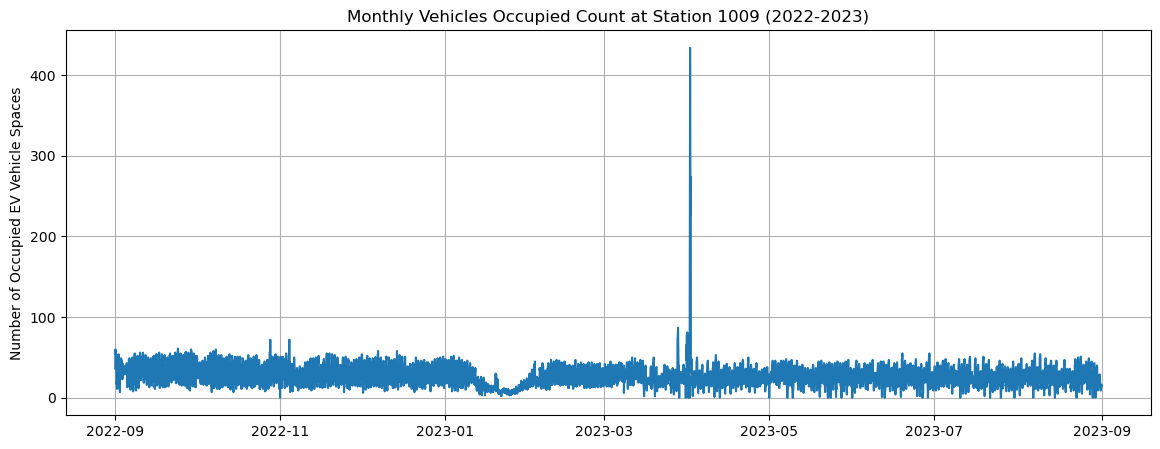

In [25]:
# check for station 1009
plt.figure(figsize=(14, 5))

plt.plot(occ[['1009']])
plt.title('Hourly Vehicles Occupied Count at Station 1009 (2022-2023)')
plt.ylabel('Number of Occupied EV Vehicle Spaces')
plt.grid(True) #the mean appears stable

In [ ]:
# pile count is 72 for station 1009. 
#over-ocuppied at the peaks at >400 cars

In [29]:
occ[['1009']].value_counts()

1009 
18.0     362
19.0     350
17.0     342
21.0     304
16.0     295
        ... 
77.0       1
76.0       1
66.0       1
59.0       1
434.0      1
Name: count, Length: 82, dtype: int64

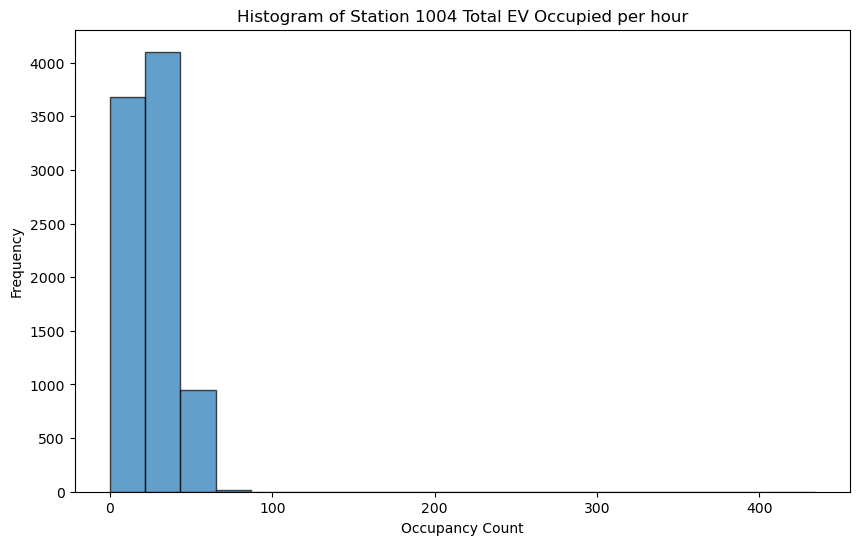

In [31]:
# histogram
plt.figure(figsize=(10, 6)) 
plt.hist(occ['1009'], bins=20, edgecolor='black', alpha=0.7) 
plt.xlabel('Occupancy Count') 
plt.ylabel('Frequency') 
plt.title('Histogram of Station 1004 Total EV Occupied per hour')
plt.show() 

In [33]:
#how many intances greater than 72 (max pile count for station 1009) 20 instances.
(occ['1009'] > 72).sum()

20

In [35]:
occ[occ['1009'] >72] #mostly occuring in he 3rd and 4th month = busy months

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682
time,,,,,,,,,,,,,,,,,,,,,
2023-03-28 02:00:00,0.0,6.0,0.0,7.0,9.0,0.0,9.0,24.0,74.0,35.0,...,6.0,3.0,4.0,5.0,6.0,0.0,7.0,0.0,0.0,1.0
2023-03-28 03:00:00,0.0,11.0,0.0,7.0,9.0,0.0,10.0,26.0,74.0,30.0,...,6.0,3.0,4.0,5.0,6.0,0.0,7.0,0.0,0.0,1.0
2023-03-28 04:00:00,0.0,9.0,0.0,7.0,9.0,0.0,10.0,24.0,78.0,30.0,...,6.0,3.0,4.0,5.0,6.0,0.0,7.0,0.0,0.0,1.0
2023-03-28 05:00:00,0.0,8.0,0.0,7.0,9.0,0.0,10.0,25.0,84.0,37.0,...,6.0,3.0,0.0,5.0,6.0,0.0,7.0,0.0,0.0,1.0
2023-03-28 06:00:00,0.0,10.0,0.0,7.0,8.0,0.0,10.0,26.0,87.0,41.0,...,6.0,3.0,5.0,5.0,6.0,0.0,7.0,0.0,0.0,1.0
2023-03-28 07:00:00,0.0,8.0,0.0,7.0,9.0,0.0,9.0,27.0,78.0,43.0,...,5.0,3.0,4.0,5.0,5.0,0.0,7.0,0.0,0.0,1.0
2023-03-28 08:00:00,0.0,9.0,0.0,6.0,6.0,1.0,6.0,26.0,76.0,40.0,...,3.0,3.0,4.0,4.0,3.0,0.0,4.0,0.0,0.0,1.0
2023-03-31 12:00:00,0.0,9.0,0.0,6.0,6.0,0.0,1.0,21.0,78.0,30.0,...,1.0,2.0,1.0,2.0,3.0,1.0,2.0,0.0,2.0,0.0
2023-03-31 16:00:00,0.0,9.0,0.0,4.0,4.0,0.0,2.0,17.0,81.0,17.0,...,4.0,2.0,1.0,1.0,3.0,2.0,2.0,0.0,2.0,0.0


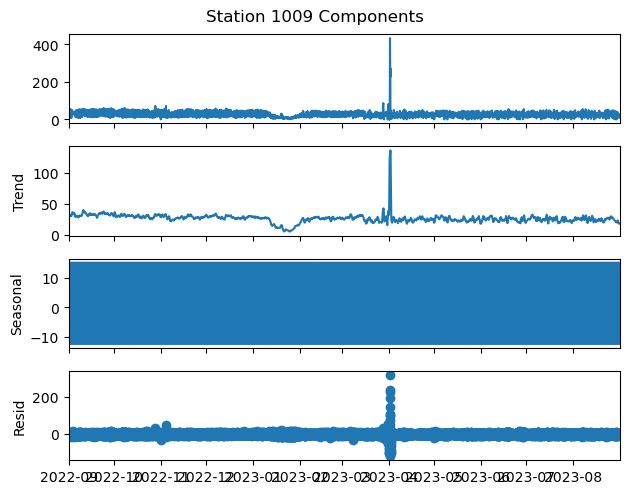

In [37]:
# Decomposition
decomp = seasonal_decompose(occ[['1009']])
decomp.plot()
plt.suptitle('Station 1009 Components', y = 1.02) #moved the y a littleup
plt.show()

In [ ]:
#components:
# - not so clear seasonal pattern
# - trend is relatively flat except the one peaks and trough.
# - seasonal - difficult to see pattern
# - fluctuations high at mid year point.

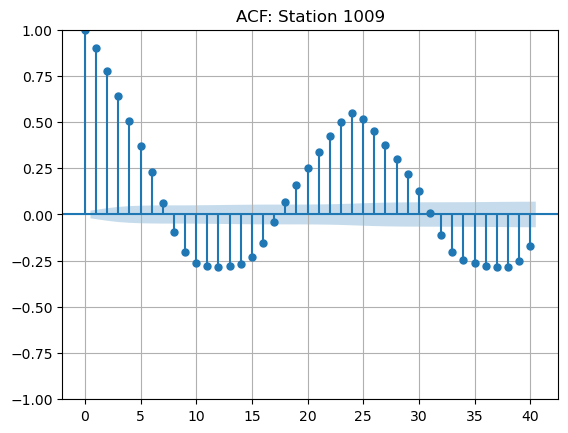

In [39]:
# ACF
plot_acf(occ[['1009']])
plt.title('ACF: Station 1009')
plt.grid(True) # clear seasonal pattern with points lying outside the significant band

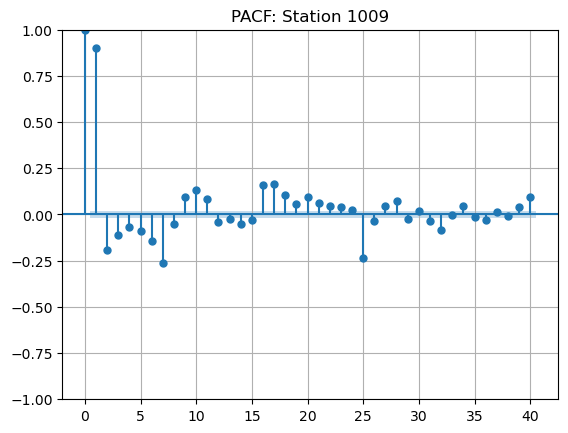

In [41]:
# PACF
plot_pacf(occ[['1009']])
plt.title('PACF: Station 1009')
plt.grid(True)

In [ ]:
#PACF shows 
# many significant spikes outside the significant band
# - weaker correlations than ACF
# - Negative correlation at 25 months

In [43]:
# Resample occupancy data by month and calculate statistics for station 1009
occ_st1009_monthly = occ[['1009']].resample('ME').sum() 
occ_st1009_monthly

,1009
time,
2022-09-30,23980.0
2022-10-31,22741.0
2022-11-30,20435.0
2022-12-31,21645.0
2023-01-31,13169.0
2023-02-28,17647.0
2023-03-31,20039.0
2023-04-30,20158.0
2023-05-31,18724.0


In [ ]:
# per month, station 1009 has 13,000-23,000 cars charging

In [51]:
# Resample occupancy data by week and calculate statistics for station 1009
occ_st1009_weekly = occ[['1009']].resample('W').sum() 
occ_st1009_weekly.head()

,1009
time,
2022-09-04,3272.0
2022-09-11,5438.0
2022-09-18,5572.0
2022-09-25,5722.0
2022-10-02,5548.0


In [ ]:
#per week, station 1009 has approx 5000 cars charging

## Model

In [56]:
# add a month feature for modelling
occ_st1009_monthly['month'] = occ_st1009_monthly.index.month
occ_st1009_monthly

,1009,month
time,,
2022-09-30,23980.0,9
2022-10-31,22741.0,10
2022-11-30,20435.0,11
2022-12-31,21645.0,12
2023-01-31,13169.0,1
2023-02-28,17647.0,2
2023-03-31,20039.0,3
2023-04-30,20158.0,4
2023-05-31,18724.0,5


In [140]:
occ[['1009']].isna().sum()

1009    0
dtype: int64

## Train-test split

In [92]:
# split the data temporally, no shuffling, 90% train data, 10% test, 
y_train, y_test = train_test_split(occ[['1009']], test_size=0.1, shuffle=False, random_state=123)

In [94]:
y_train.shape

(7884, 1)

In [96]:
y_test.shape

(876, 1)

In [129]:
#y_train.isna().sum() # check nans 

1009    9
dtype: int64

In [ ]:
## Stationarity

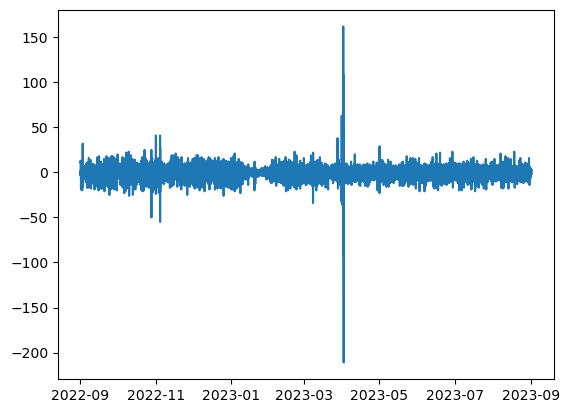

In [74]:
plt.plot(occ[['1009']].diff());

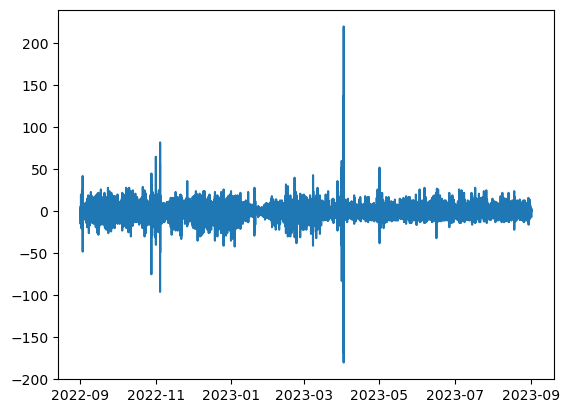

In [76]:
plt.plot(occ[['1009']].diff().diff());

In [ ]:
#seasonal and non-stationary as there are still peaks in first diff and second diff

In [78]:
#null hypothesis: our data is stationary (Ho)

adf, pval, *_ = adfuller(occ[['1009']].diff().diff().dropna())
print(f"ADF = {adf}")
print(f"p-value = {pval}")

ADF = -28.857886473757844
p-value = 0.0


In [84]:
# report results for ADF
adf_statistic, p_value, usedlag, nobs, critical_values, icbest = adfuller(occ[['1009']].diff().diff().dropna())
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value) #>0.05 threshold, if we go over we stop, it's statistically. significant

# Critical values from Dickey-Fuller distribution tables
print('\nCritical values:')
for key, value in critical_values.items():
   print(f'\t{key}: {value}')

ADF Statistic: -28.857886473757844
p-value: 0.0

Critical values:
	1%: -3.43110014060145
	5%: -2.861871512164798
	10%: -2.5669464589602096


In [ ]:
#p_value is 0, low p, reject null hypothesis, thus we diff twice.
# the ADF test statistic is negative. The more negative it is, the stronger the evidence against the null hypothesis (i.e., stronger evidence for stationarity)

In [ ]:
# p=1, d=2, q=1

## ARIMA Model

In [100]:
y_train = y_train.asfreq('4h') #trying 4hours
model = ARIMA(y_train, order=(1,2,1)).fit()

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   1009   No. Observations:                 1971
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -8199.811
Date:                Mon, 16 Dec 2024   AIC                          16405.622
Time:                        23:01:52   BIC                          16422.377
Sample:                    09-01-2022   HQIC                         16411.779
                         - 07-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1015      0.005     20.151      0.000       0.092       0.111
ma.L1         -0.9999      0.068    -14.614      0.000      -1.134      -0.866
sigma2       241.6224     15.706     15.384      0.000     210.840     272.405
===================================================================================
Ljung-Box (L1) (Q):                   3.88   Jarque-Bera (JB):           1740412.85
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             4.14
Prob(H) (two-sided):                  0.00   Kurtosis:                       148.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
model.aic # baseline for comparison, we can try other arima orders or pdq combos to see if they yield lower aic scores

16405.621593452834

In [111]:
y_train = y_train.asfreq('W') #trying weekly
model = ARIMA(y_train, order=(1,2,1)).fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   1009   No. Observations:                   47
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -145.853
Date:                Mon, 16 Dec 2024   AIC                            297.706
Time:                        23:13:39   BIC                            303.126
Sample:                    09-04-2022   HQIC                           299.727
                         - 07-23-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3267      0.163     -2.003      0.045      -0.647      -0.007
ma.L1         -0.9994     10.748     -0.093      0.926     -22.065      20.066
sigma2        34.6415    371.131      0.093      0.926    -692.762     762.045
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.94   Prob(JB):                         0.59
Heteroskedasticity (H):               1.26   Skew:                             0.21
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
model.aic # better aic for weekly

297.70633669703733

In [117]:
#monthly
y_train = y_train.asfreq('MS') #trying monthly
model_monthly = ARIMA(y_train, order=(1,2,1)).fit()

In [119]:
model_monthly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   1009   No. Observations:                   10
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  -9.243
Date:                Mon, 16 Dec 2024   AIC                             24.487
Time:                        23:16:36   BIC                             24.725
Sample:                    10-01-2022   HQIC                            22.879
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0   3.32e+05          0      1.000    -6.5e+05     6.5e+05
ma.L1               0   3.32e+05          0      1.000    -6.5e+05     6.5e+05
sigma2         1.0000   2.49e+05   4.02e-06      1.000   -4.88e+05    4.88e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                10.15
Prob(Q):                              0.59   Prob(JB):                         0.01
Heteroskedasticity (H):               0.00   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.4e+16. Standard errors may be unstable.
"""

In [121]:
model_monthly.aic #better aic

24.486648850699833

## ARIMA Parameter Search

In [107]:
from itertools import product
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [123]:
%%time
#measures the execution of the code block 
y_train.index =pd.to_datetime(y_train.index)
y_train = y_train.asfreq('MS')

p_array = np.arange(13) # array of integers 0-12 for p values in the ARIMA model
d=2

#array of integers 0-12 for p values in the ARIMA model
q_array = np.arange(13)
results = []
for p, q in product(p_array, q_array):
    model= ARIMA(y_train, order=(p, d, q)).fit()
    results.append((p, q, model.aic))

C:\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\anaconda\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\anaconda\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\anaconda\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\anaconda\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


LinAlgError: Schur decomposition solver error.

In [ ]:
df_results = pd.DataFrame(results, columns=['p', 'q', 'aic'])
df_results.sort_values('aic').head(10)

## SARIMAX

In [ ]:
# Fit the SARIMAX model 
# model = sm.tsa.SARIMAX(df['value'], order=order, seasonal_order=seasonal_order, exog=df['exog_var']) 
# results = model.fit() 
# # Review the model summary 
# print(results.summary()) 
# # Forecasting 
# forecast_steps = 12 # Number of steps to forecast 
# exog_forecast = np.random.randn(forecast_steps) * 5 # Exogenous variable for the forecast period 
# forecast = results.get_forecast(steps=forecast_steps, exog=exog_forecast) 
# forecast_df = forecast.summary_frame() 
# print("Forecasted Values:") 
# print(forecast_df)